Habermans's survival Exploratory

Problem description:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Dataset reference:
https://www.kaggle.com/gilsousa/habermans-survival-data-set

Title: Haberman's Survival Data

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


In [1]:
# Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data
df = pd.read_csv("haberman.csv", names=['Age', 'Year', 'Axillary nodes dect', 'Survstatus'])
print(df)

     Age  Year  Axillary nodes dect  Survstatus
0     30    64                    1           1
1     30    62                    3           1
2     30    65                    0           1
3     31    59                    2           1
4     31    65                    4           1
..   ...   ...                  ...         ...
301   75    62                    1           1
302   76    67                    0           1
303   77    65                    3           1
304   78    65                    1           2
305   83    58                    2           2

[306 rows x 4 columns]


Number of datapoints are

In [2]:
print(df.shape)

(306, 4)


Columns of Dataset

In [3]:
print(df.columns) # output gives columns name which have assigned and its type

Index(['Age', 'Year', 'Axillary nodes dect', 'Survstatus'], dtype='object')


In [4]:
#We have 2 classes within Survstatus,person who survived for 5 or more year and person died with in 5 year
print(df['Survstatus'].value_counts())
print("*"*50)
df['Survstatus'].value_counts(normalize=True)

1    225
2     81
Name: Survstatus, dtype: int64
**************************************************


1    0.735294
2    0.264706
Name: Survstatus, dtype: float64

High Level Statistics 

In [5]:
print(df.describe())

              Age        Year  Axillary nodes dect  Survstatus
count  306.000000  306.000000           306.000000  306.000000
mean    52.457516   62.852941             4.026144    1.264706
std     10.803452    3.249405             7.189654    0.441899
min     30.000000   58.000000             0.000000    1.000000
25%     44.000000   60.000000             0.000000    1.000000
50%     52.000000   63.000000             1.000000    1.000000
75%     60.750000   65.750000             4.000000    2.000000
max     83.000000   69.000000            52.000000    2.000000


Observations:
The age of the patients vary from 30 to 83 with the median of 52.

Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the population have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes

The dataset contains only a small number of records (306)

The target column is imbalanced dataset with 73% of values are 1

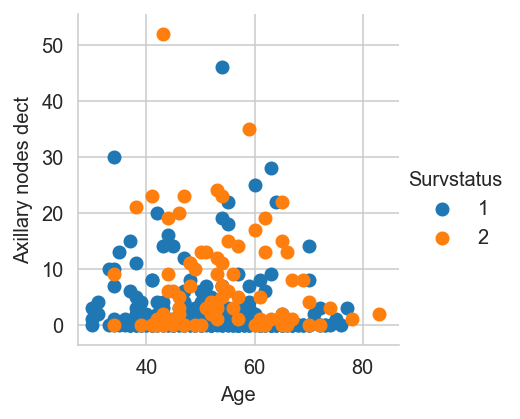

In [6]:
#2D Scatter map
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Survstatus', height=3) \
    .map(plt.scatter, 'Age', 'Axillary nodes dect') \
    .add_legend()
plt.show()

Observation :
    Overlapped occurs between Age and Axillary nodes dect features so the classification is not feasible

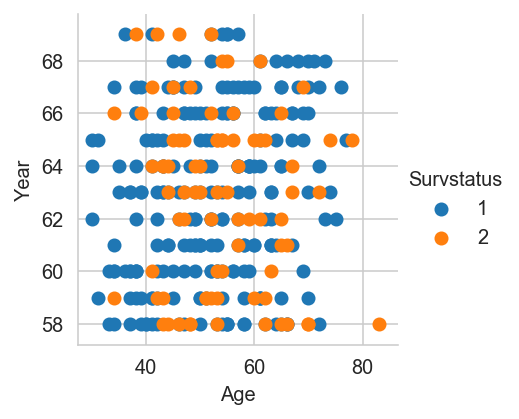

In [7]:
# For Age and Year

sns.set_style('whitegrid')
sns.FacetGrid(df, hue="Survstatus", height=3) \
    .map(plt.scatter, 'Age', 'Year') \
    .add_legend()
plt.show()

Observation : 
    Overlapped occue between Age and year so classification is not possible

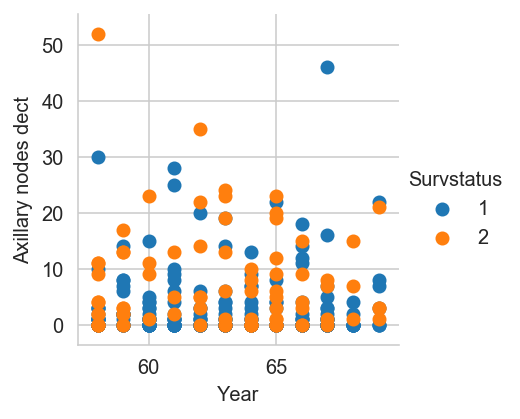

In [8]:
# For Year and Axillary nodes dect
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Survstatus', height=3) \
    .map(plt.scatter, 'Year', 'Axillary nodes dect') \
    .add_legend()
plt.show()

Observation :No classification is possible  between Year and Axillary nodes dect

Pairplots
Here we get 3c2 = 3 because 3 for features and out of which we select only 2. Therefore the answer is 3.

In the pairplots we not take the principle diagonal graphs but upper diagonal graphs are same as lower diagonal only the change is in the axis.

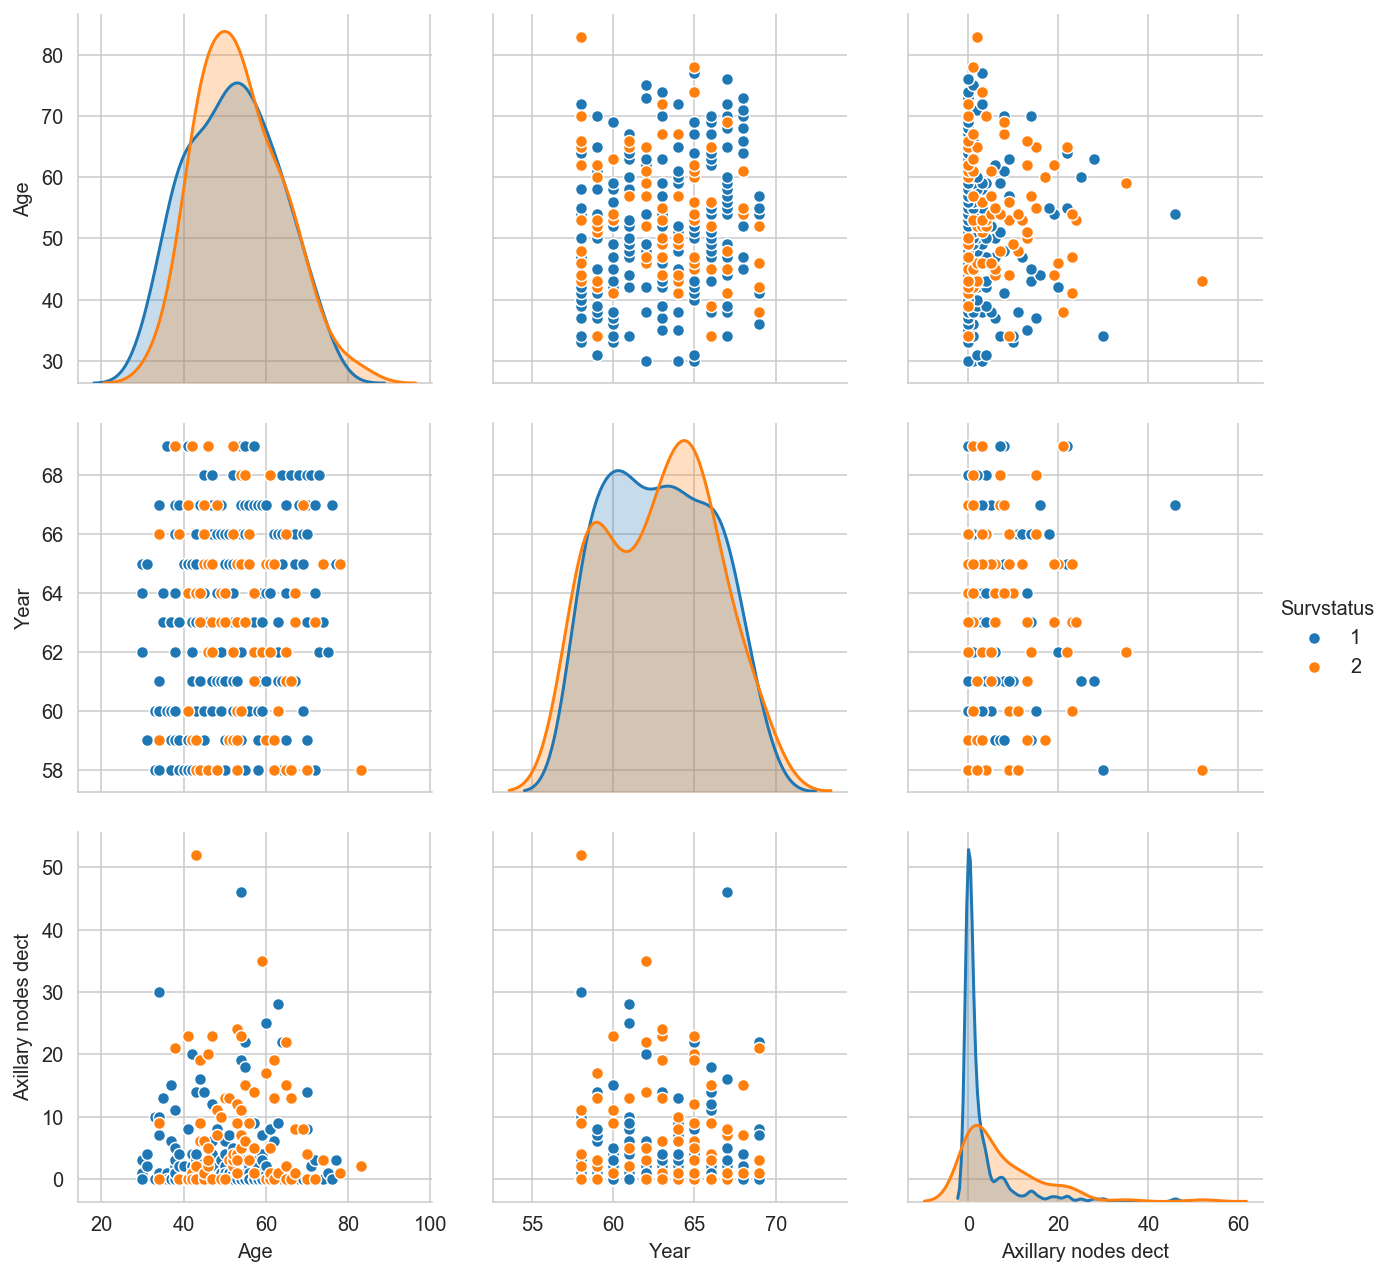

In [9]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Survstatus', vars=['Age', 'Year', 'Axillary nodes dect'], height=3)
plt.show()

1D scatter

Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points lie within that group. (histogram)

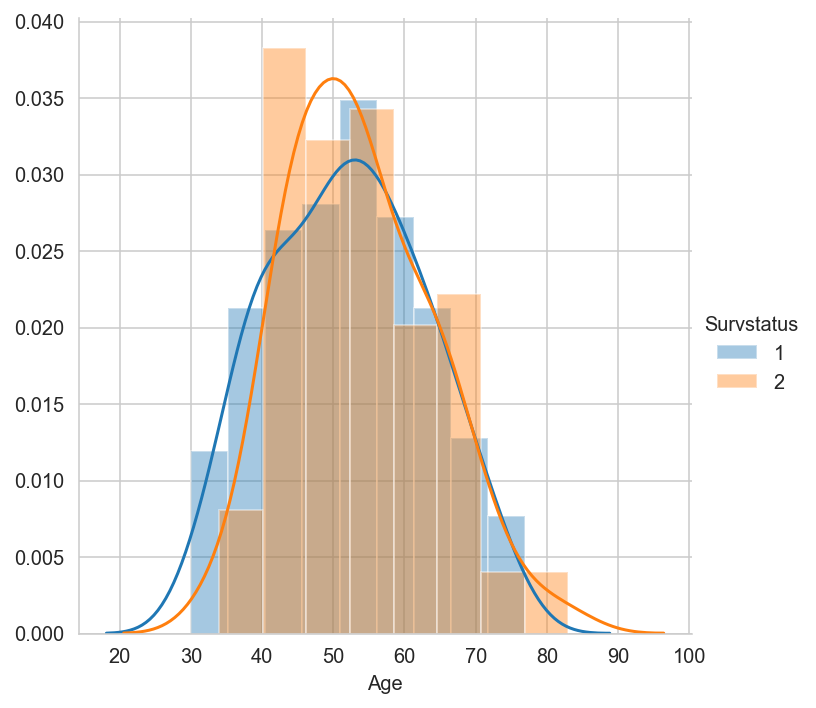

In [10]:
# plotting one dimensionally
sns.FacetGrid(df, hue='Survstatus', height=5) \
    .map(sns.distplot, 'Age') \
    .add_legend()
    

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


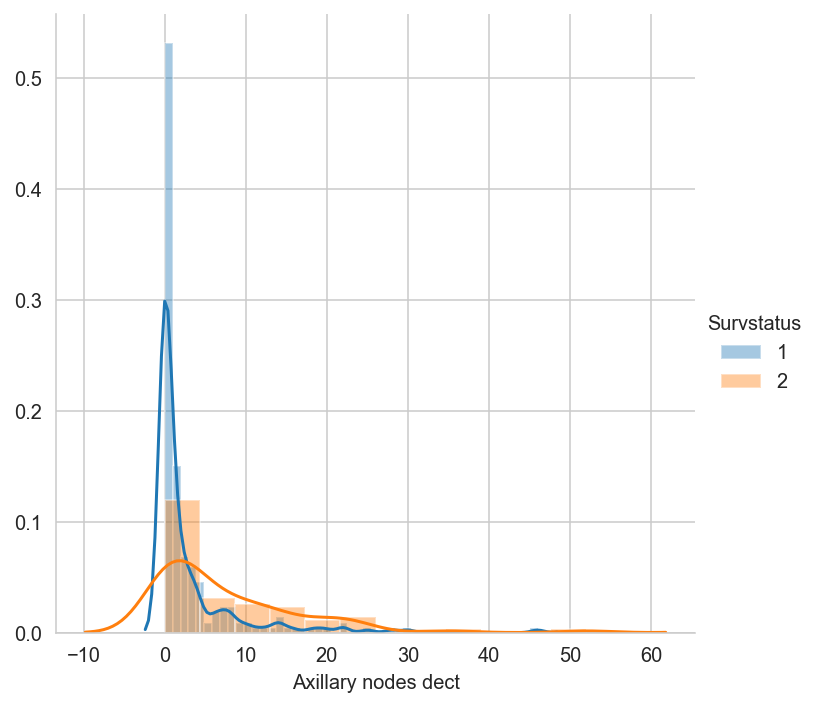

In [11]:
sns.FacetGrid(df, hue='Survstatus', size=5) \
    .map(sns.distplot, 'Axillary nodes dect') \
    .add_legend()

Observation :
    Axillary nodes dect have outlier at 46 which survied for more than 5 year otherwise if Axillary nodes dect greater than 30 mostly demise

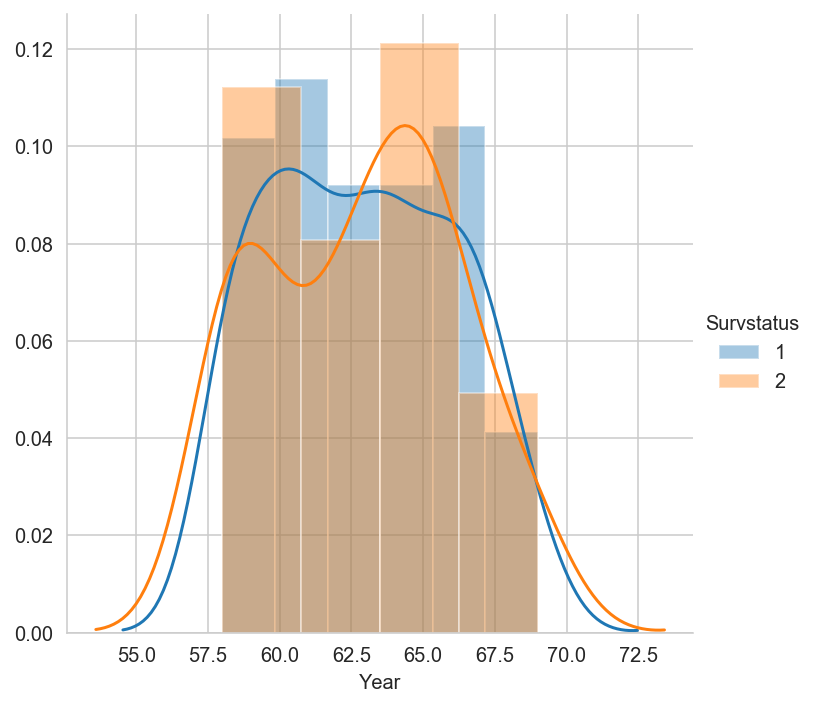

In [12]:
sns.FacetGrid(df, hue='Survstatus', height=5) \
    .map(sns.distplot, 'Year') \
    .add_legend()

CDF (Commulative Distribution Function
     
From above we choose one feature that is Auxillary nodes dect
     
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

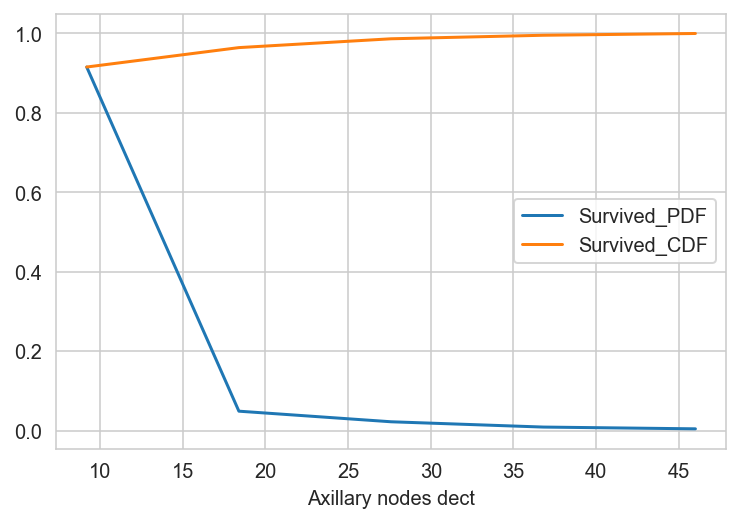

In [13]:
## Analysing more on yearly basis using histogram, PDF and CDF
df_sur = df.loc[df["Survstatus"]==1]
counts, bin_edges = np.histogram(df_sur['Axillary nodes dect'], bins=5, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Axillary nodes dect")
plt.show()

Observation:
    
From the above graph we can say that maximum survival for Axillary nodes dect is 46.

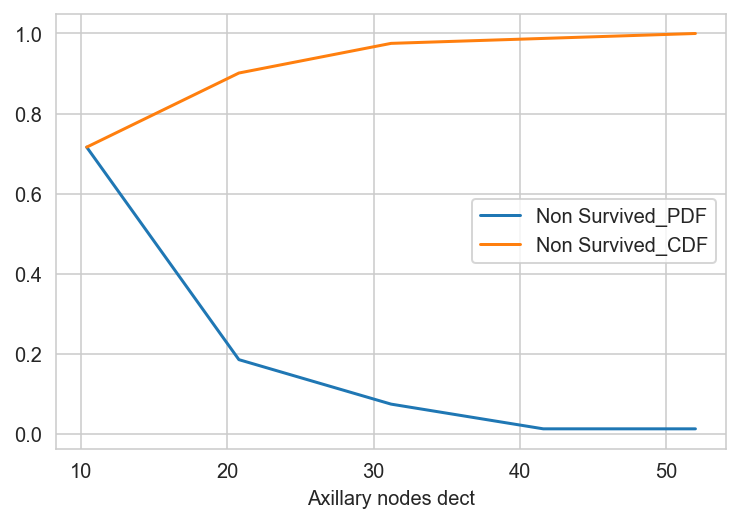

In [14]:
df_dead = df.loc[df['Survstatus']==2]
counts, bin_edges = np.histogram(df_dead['Axillary nodes dect'], bins=5, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['Non Survived_PDF', 'Non Survived_CDF'])
plt.xlabel("Axillary nodes dect")
plt.show()

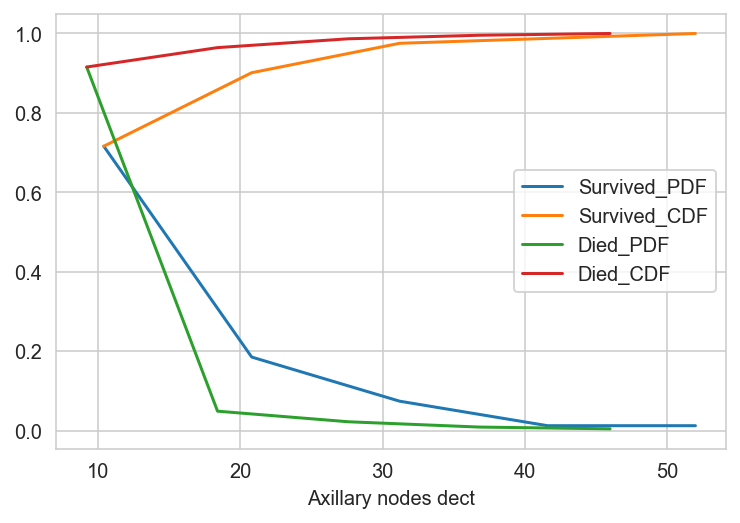

In [15]:
counts, bin_edges = np.histogram(df_dead['Axillary nodes dect'], bins=5, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_sur['Axillary nodes dect'], bins=5, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survstatus')
plt.legend(['Survived_PDF', 'Survived_CDF','Died_PDF', 'Died_CDF'])
plt.xlabel("Axillary nodes dect")
plt.show()


Observation:
    
The probablity distribution function(PDF) for the people who survived and those who died different in case of axillary nodes.Hence, axillary nodes is the most important feature to predict the survival status after 5 years.
The survival rate is extremely high for patients having less than 3 axillary nodes dect.

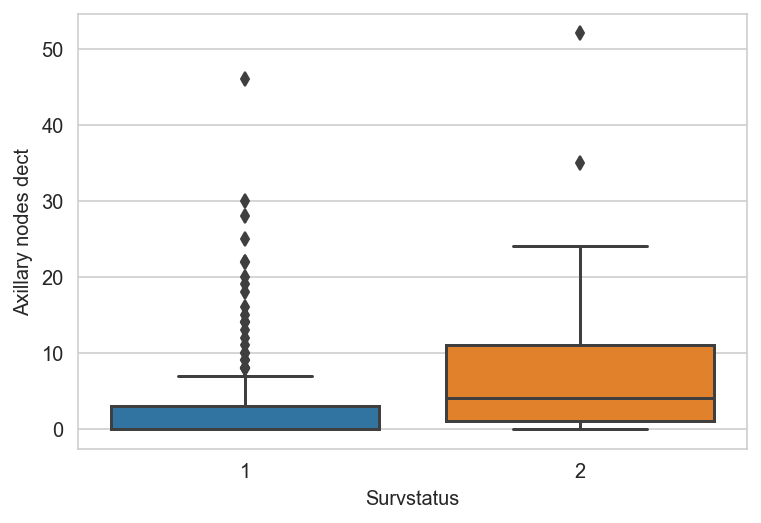

In [16]:
#Boxplot and Whiskers
sns.boxplot(x='Survstatus', y='Axillary nodes dect', data=df)
plt.show()

Observation :

Boxplot of 1 had only 75th percentile value at axillary nodes dect is 2 and the 25th and 50th percentiles are overlapped.

Boxplot of 2 had only 25th percentile value at axillary nodes dect is 1, 50th percentile value at axillary nodes dectis 3 and 75th percentile value at axillary nodes dect is 11.

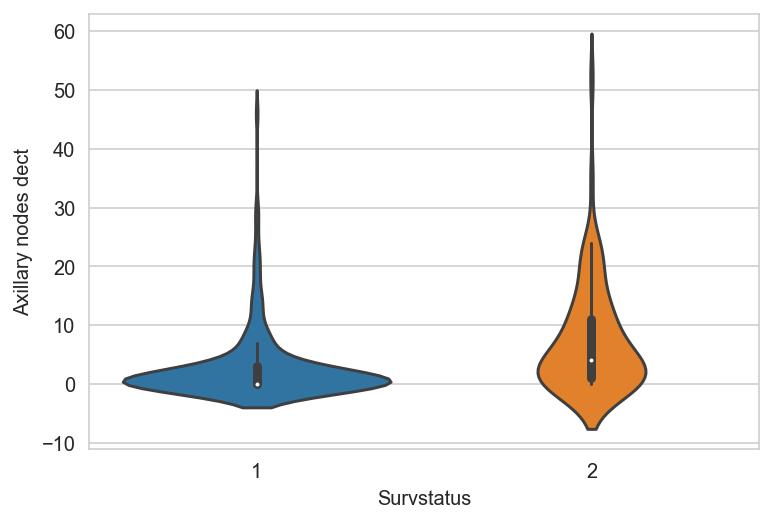

In [17]:
#Violin Plot 
#It is graph in which the histogram and boxplot are present
sns.violinplot(x='Survstatus', y='Axillary nodes dect', data=df, size=5)
plt.show()

Observation

50th percentile of survivors have 0 positive nodes, 75th percentie of survivors have less than 3 positive axilary nodes
25th percentile of dead have 1 positive axilary node, 50th percentile of dead have positive axilary nodes below 4,
75th percentile of dead have positive nodes below 11

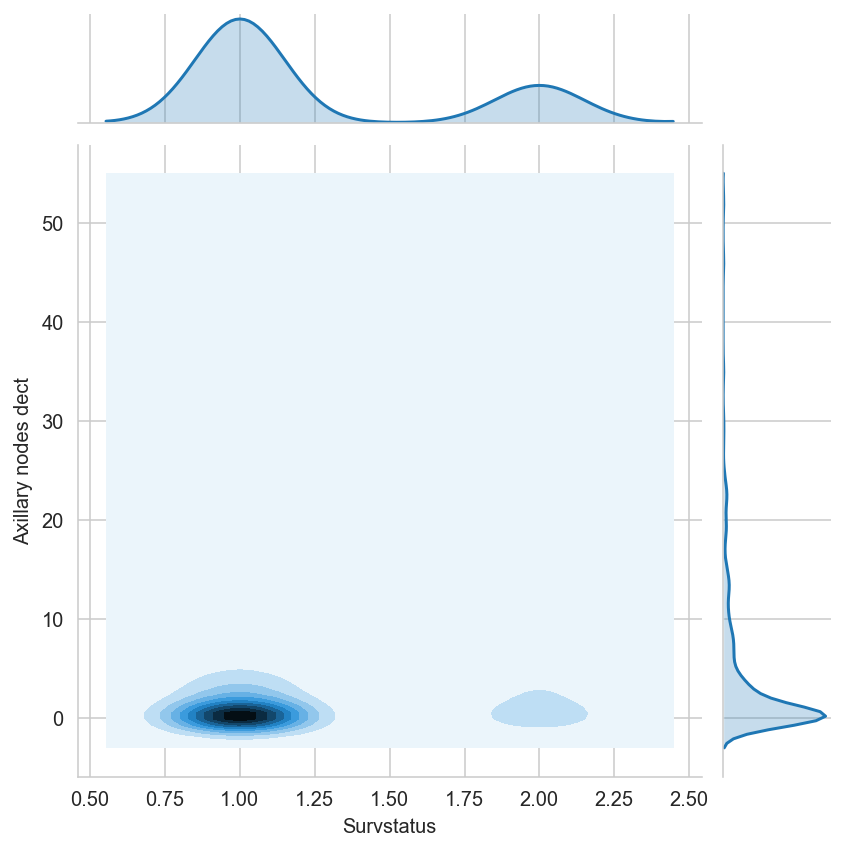

In [18]:
#Multivariate probability density, contour plot
#2D Density plot, contors-plot
sns.jointplot(x="Survstatus", y="Axillary nodes dect", data=df, kind="kde");
plt.show()


Conclusion:
    While analyzing all the plots we get conculsion that if auxillary node is less than survival of patient is more.Also, we need more feature to provide decisive conculsion.